# CSC221 Group Project
### Author: <font color='green'>Christopher Martinez Hernandez</font>
### Group members:
   - **Christopher Martinez Hernandez**
   - **Duncan Matthews**

The wiki page that I choose to webscrap is [World Economy](https://en.wikipedia.org/wiki/World_economy).

I'm importing the 'ssl' module and creating an unverified HTTPS context. This allows me to make HTTPS requests without verifying SSL certificates, which can be useful when scraping websites but bypasses security checks.

In [10]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


I'm importing two libraries for web scraping:
- First, the 'urllib.request' module which provides functions for opening URLs
- Then I'm importing BeautifulSoup from the bs4 package, which is a powerful tool for parsing HTML


In [12]:
import urllib.request
from bs4 import BeautifulSoup

I'm setting up my web scraping:
1. I define the URL variable pointing to the Wikipedia page for "World Economy"
2. I use urllib.request.urlopen() to fetch the webpage content and store it in the 'page' variable
3. I create a BeautifulSoup object called 'soup' from the page content, specifying "lxml" as the HTML parser


In [14]:
url = "https://en.wikipedia.org/wiki/World_economy"
page = urllib.request.urlopen(url)
soup = BeautifulSoup(page, "lxml")

I'm printing the BeautifulSoup object with the .prettify() method, which formats the HTML in a more readable way with proper indentation. The output below this cell shows the beginning of the HTML structure of the Wikipedia page.


In [16]:
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-sticky-header-enabled vector-toc-available" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   World economy - Wikipedia
  </title>
  <script>
   (function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-e


I'm finding all table elements on the Wikipedia page by using BeautifulSoup's find_all() method:
1. First, I assign all table elements to the variable `all_tables` by searching for the "table" tag
2. Then I loop through each table in the collection
3. For each table, I'm printing it with the .prettify() method to see its formatted HTML structure


In [18]:
all_tables = soup.find_all("table")
for tables in all_tables:
    print(tables.prettify())
    print("\n")

<table class="sidebar nomobile nowraplinks hlist" style="width:20em">
 <tbody>
  <tr>
   <th class="sidebar-title">
    <a class="mw-selflink selflink">
     World economy
    </a>
   </th>
  </tr>
  <tr>
   <td class="sidebar-image">
    <span typeof="mw:File">
     <a class="mw-file-description" href="/wiki/File:Big_data_(21036)_-_The_Noun_Project.svg">
      <img class="mw-file-element" data-file-height="511" data-file-width="512" decoding="async" height="80" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/05/Big_data_%2821036%29_-_The_Noun_Project.svg/120px-Big_data_%2821036%29_-_The_Noun_Project.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/05/Big_data_%2821036%29_-_The_Noun_Project.svg/250px-Big_data_%2821036%29_-_The_Noun_Project.svg.png 2x" width="80"/>
     </a>
    </span>
   </td>
  </tr>
  <tr>
   <td class="sidebar-content">
    <ul>
     <li>
      <a href="/wiki/Economy_of_Africa" title="Economy of Africa">
       Africa
      </a>
     </li>
  

I'm now searching for a specific type of table with particular attributes:
1. I use soup.find_all() to look for "table" elements that have the class "wikitable mw-collapsible"
2. I store these specific tables in the variable `set_table`
3. I print the length of set_table to see how many matching tables I found
4. Then I loop through each table in this set

In [20]:
set_table = soup.find_all("table", class_="wikitable mw-collapsible")
print(len(set_table))
for table in set_table:
    if table == set_table[0]:
        whole_table = table
        print(table)


6
<table class="wikitable mw-collapsible">
<tbody><tr>
<th colspan="4" style="text-align:center;">The 30 largest economies by GDP (nominal), the 30 largest economies by GDP (<a href="/wiki/Purchasing_power_parity" title="Purchasing power parity">PPP</a>), 28 economies with the highest peak GDP per capita (nominal) and the 28 economies with the highest peak GDP per capita (PPP) as of 2025. Members of the <a href="/wiki/G20" title="G20">G-20 major economies</a> are in bold.
</th></tr>
<tr style="text-align:center;">
<td style="width:25%;"><b>List of the 30 largest economies<br/> by GDP (nominal) at their peak level as of 2025 in million US$</b><sup class="reference" id="cite_ref-IMF_Data_5-1"><a href="#cite_note-IMF_Data-5"><span class="cite-bracket">[</span>5<span class="cite-bracket">]</span></a></sup>
</td>
<td style="width:25%;"><b>List of the 30 largest economies<br/> by GDP (PPP) at their peak level as of 2025 in million Int$</b><sup class="reference" id="cite_ref-IMF_Data_5-2"><a 


I'm initializing empty lists to store data I'll extract from the table:
1. `Rank` - to store ranking numbers
2. `Country` - to store country names
3. `Value` - to store GDP values
4. `Year` - to store the year the data is from

Then I'm looping through the rows of the table:
1. For each row, I find all cells (`<td>` elements)
2. I extract the text content from each cell
3. I use `.strip()` to remove any extra whitespace
4. I append this cleaned data to the appropriate lists
5. I'm specifically looking for rank, country name, GDP value, and year data



In [22]:
Rank = []
Country = []
Value = []
Year = []

right_table = whole_table.find("table", class_="wikitable")
for rows in right_table.find_all("tr"):
    cells = rows.find_all("td")
    if len(cells) == 4:
        Rank.append(cells[0].find(string=True).strip())
        mgr_link = cells[1].find_all('a')
        Country.append(mgr_link[0].contents[0].strip())
        Value.append(cells[2].find(string=True).strip())
        Year.append(cells[3].find(string=True).strip())

I'm importing pandas as 'pd' to create a DataFrame from the data I've collected. This will help me organize and analyze the economic data more effectively.

Then I'm creating a DataFrame by:
1. Specifying my column names as 'Rank', 'Country', 'Value', and 'Year'
2. Using the data I've extracted and stored in my lists


In [24]:
import pandas as pd
df = pd.DataFrame(Rank, columns=["Rank"])
df['Country'] = Country
df['Value'] = Value
df['Year'] = Year
print("List of the 50 largest economies by GDP (nominal) at their peak level as of 2024 in million US$[5]")
df

List of the 50 largest economies by GDP (nominal) at their peak level as of 2024 in million US$[5]


,Rank,Country,Value,Year
0,—,World,"113,795,678",2025
1,1,United States,"30,507,217",2025
2,—,European Union,"19,991,160",2025
3,2,China,"19,231,705",2025
4,3,Japan,"6,272,363",2012
5,4,Germany,"4,744,804",2025
6,5,India,"4,187,017",2025
7,6,United Kingdom,"3,839,180",2025
8,7,France,"3,211,292",2025
9,—,African Union,"3,003,456",2022


Finally I'm storing pandas dataframe into a CSV file called CSC221-webscrape-data.csv

In [206]:
df.to_csv('CSC221-webscrape-data.csv', index=False)

#### 
# Part 2

## Author: Duncan Matthews

##
### Import statements for Matplotlib

In [26]:
import matplotlib.pyplot as plt

### 
### Load the CSV file into a dataframe

In [28]:
df = pd.read_csv("CSC221-webscrape-data.csv")

### 
### Name the data columns, and convert numeric columns into numerics

In [42]:
df.columns = ['Rank','Country','Value','Year']

#Convert Value column to int and remove commas and spaces
df['Value'] = df['Value'].replace({',':'',' ':''}, regex=True).astype(int)

#Convert Year column to numeric
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

#Remove world total from df to remove it from Graphs
df_filtered = df[df['Country'] != 'World']

### 
### Plot the bar chart

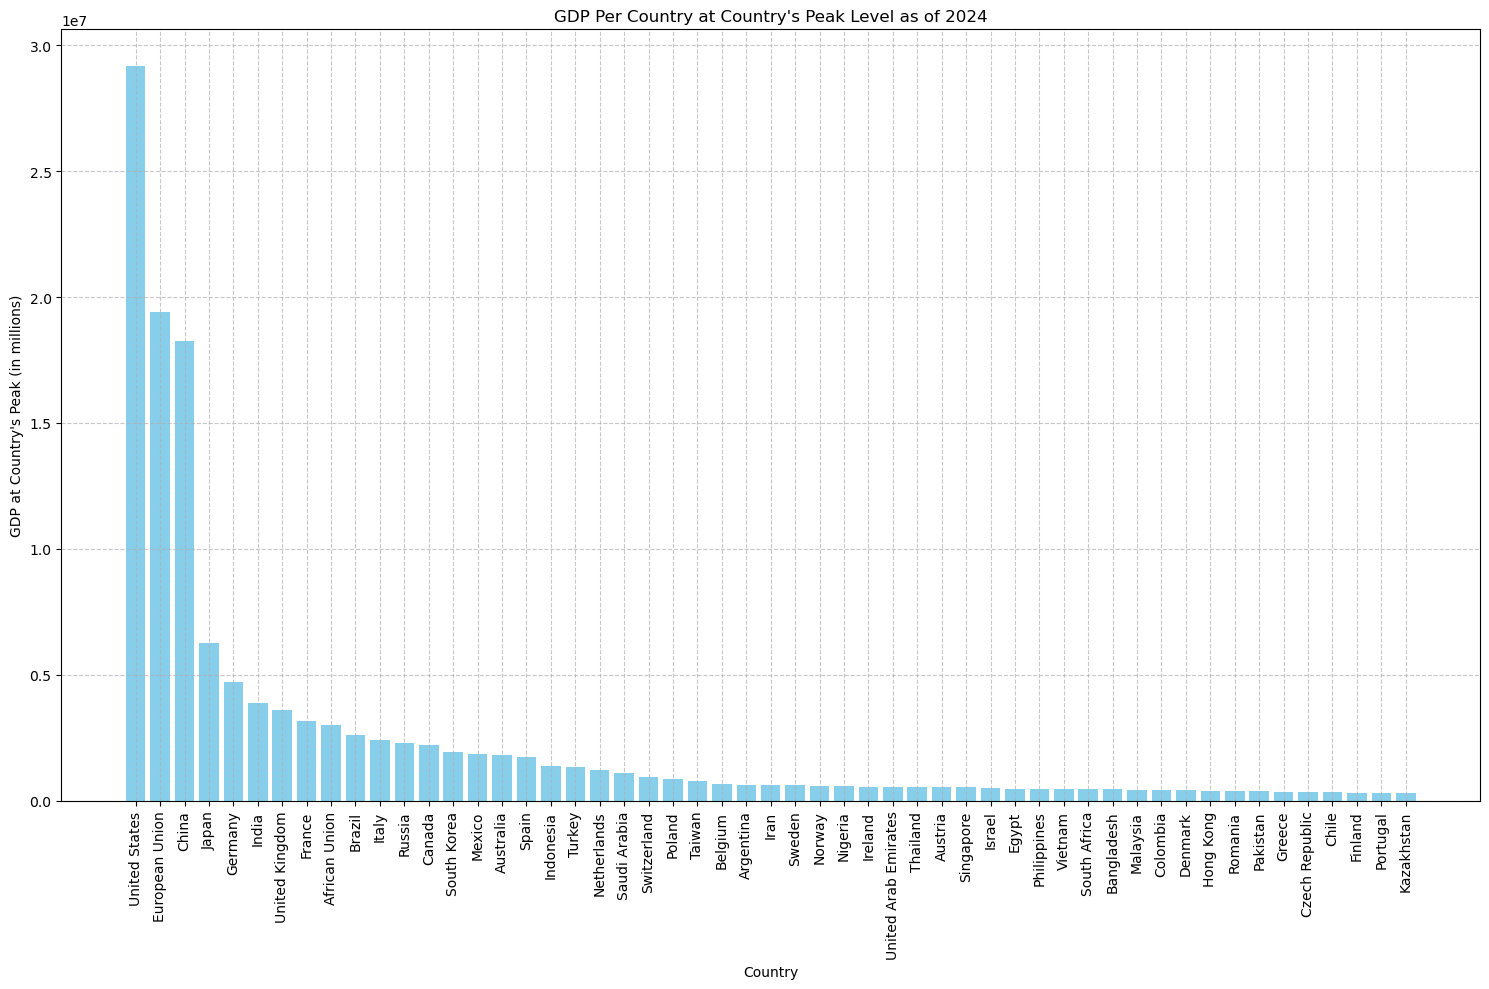

In [66]:
#Size of the graph
plt.figure(figsize=(15,10))
#set the columns used for x and y axis
plt.bar(df_filtered['Country'], df_filtered['Value'], color='skyblue')
#rotate country names for readability
plt.xticks(rotation=90)
#labels for title, x and y axis
plt.ylabel("GDP at Country's Peak (in millions)")
plt.xlabel("Country")
plt.title("GDP Per Country at Country's Peak Level as of 2024")
#place gridlines on graph, and show the graph
plt.grid(axis='both', linestyle = '--', alpha=0.7)
plt.tight_layout()
plt.show()

###
### Plot the line chart for when each country's peak year was

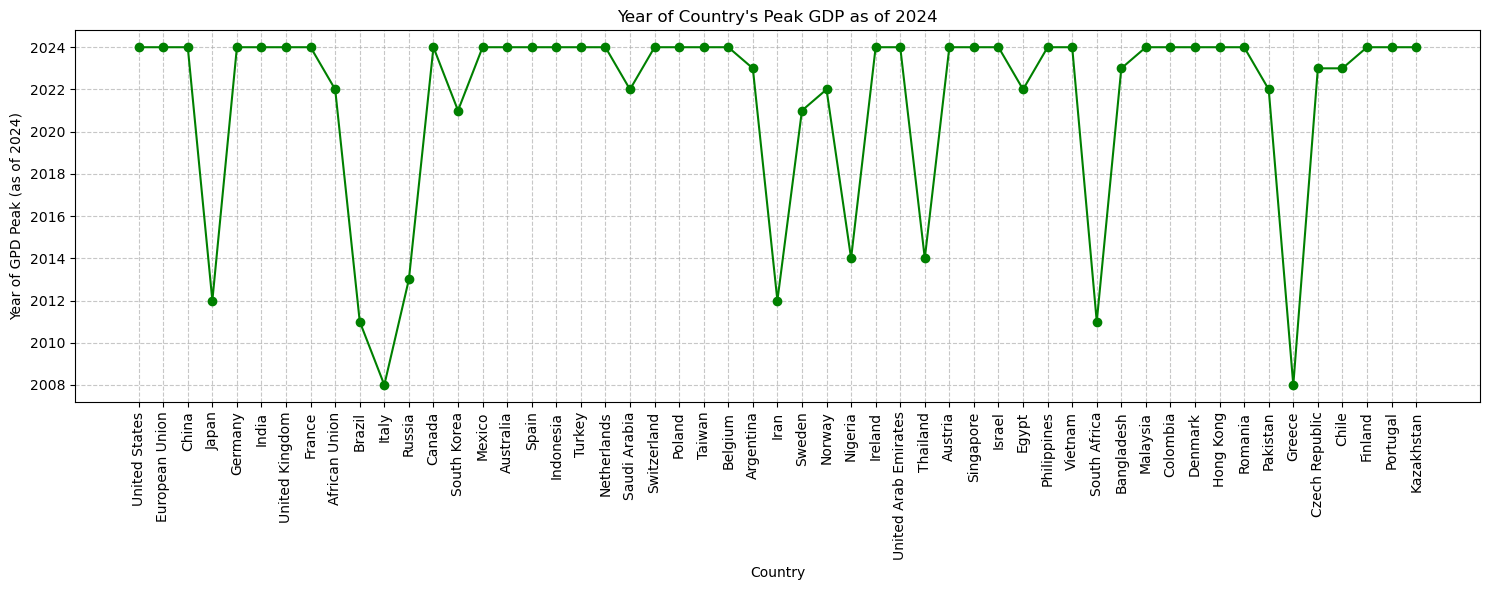

In [68]:
#Size of the graph
plt.figure(figsize=(15,6))
#set columns used for x and y axis, as well as line shape and marker shape
plt.plot(df_filtered['Country'], df_filtered['Year'], marker='o', linestyle='-', color='green')
#rotate x axis names for readability
plt.xticks(rotation=90)
#labels for graph title, x and y axis
plt.ylabel('Year of GPD Peak (as of 2024)')
plt.xlabel('Country')
plt.title("Year of Country's Peak GDP as of 2024")
#add gridlines to graph and show graph
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()